In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [25]:
col_names = ["id", "age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act", "mortgage", "pep"]
# load dataset
bank = pd.read_csv("bank.csv")
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [26]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [27]:
label_encoder = LabelEncoder()
# encoding for X
encoding_column = ["sex", "region", "married", "car", "save_act", "current_act", "mortgage"]
non_encoding_column = ["age", "income", "children"]
for enc in encoding_column: 
    bank[enc] = pd.to_numeric(label_encoder.fit_transform(bank[enc]))
# for non_enc in non_encoding_column: 
#     bank[non_enc] = bank[non_enc].replace(' ', 0).astype(str).astype(float)
    
# encoding for y
bank["pep"] = pd.to_numeric(label_encoder.fit_transform(bank["pep"]))

# X = bank[["age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act", "mortgage"]] # Features
X = bank.drop(["id","pep"],axis=1)
y = bank[["pep"]] # Target variable


In [28]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [29]:
# Create Decision Tree classifer object
# The default criterion is gini, but entropy can also be used, add entropy use criterion='entropy'
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8277777777777777


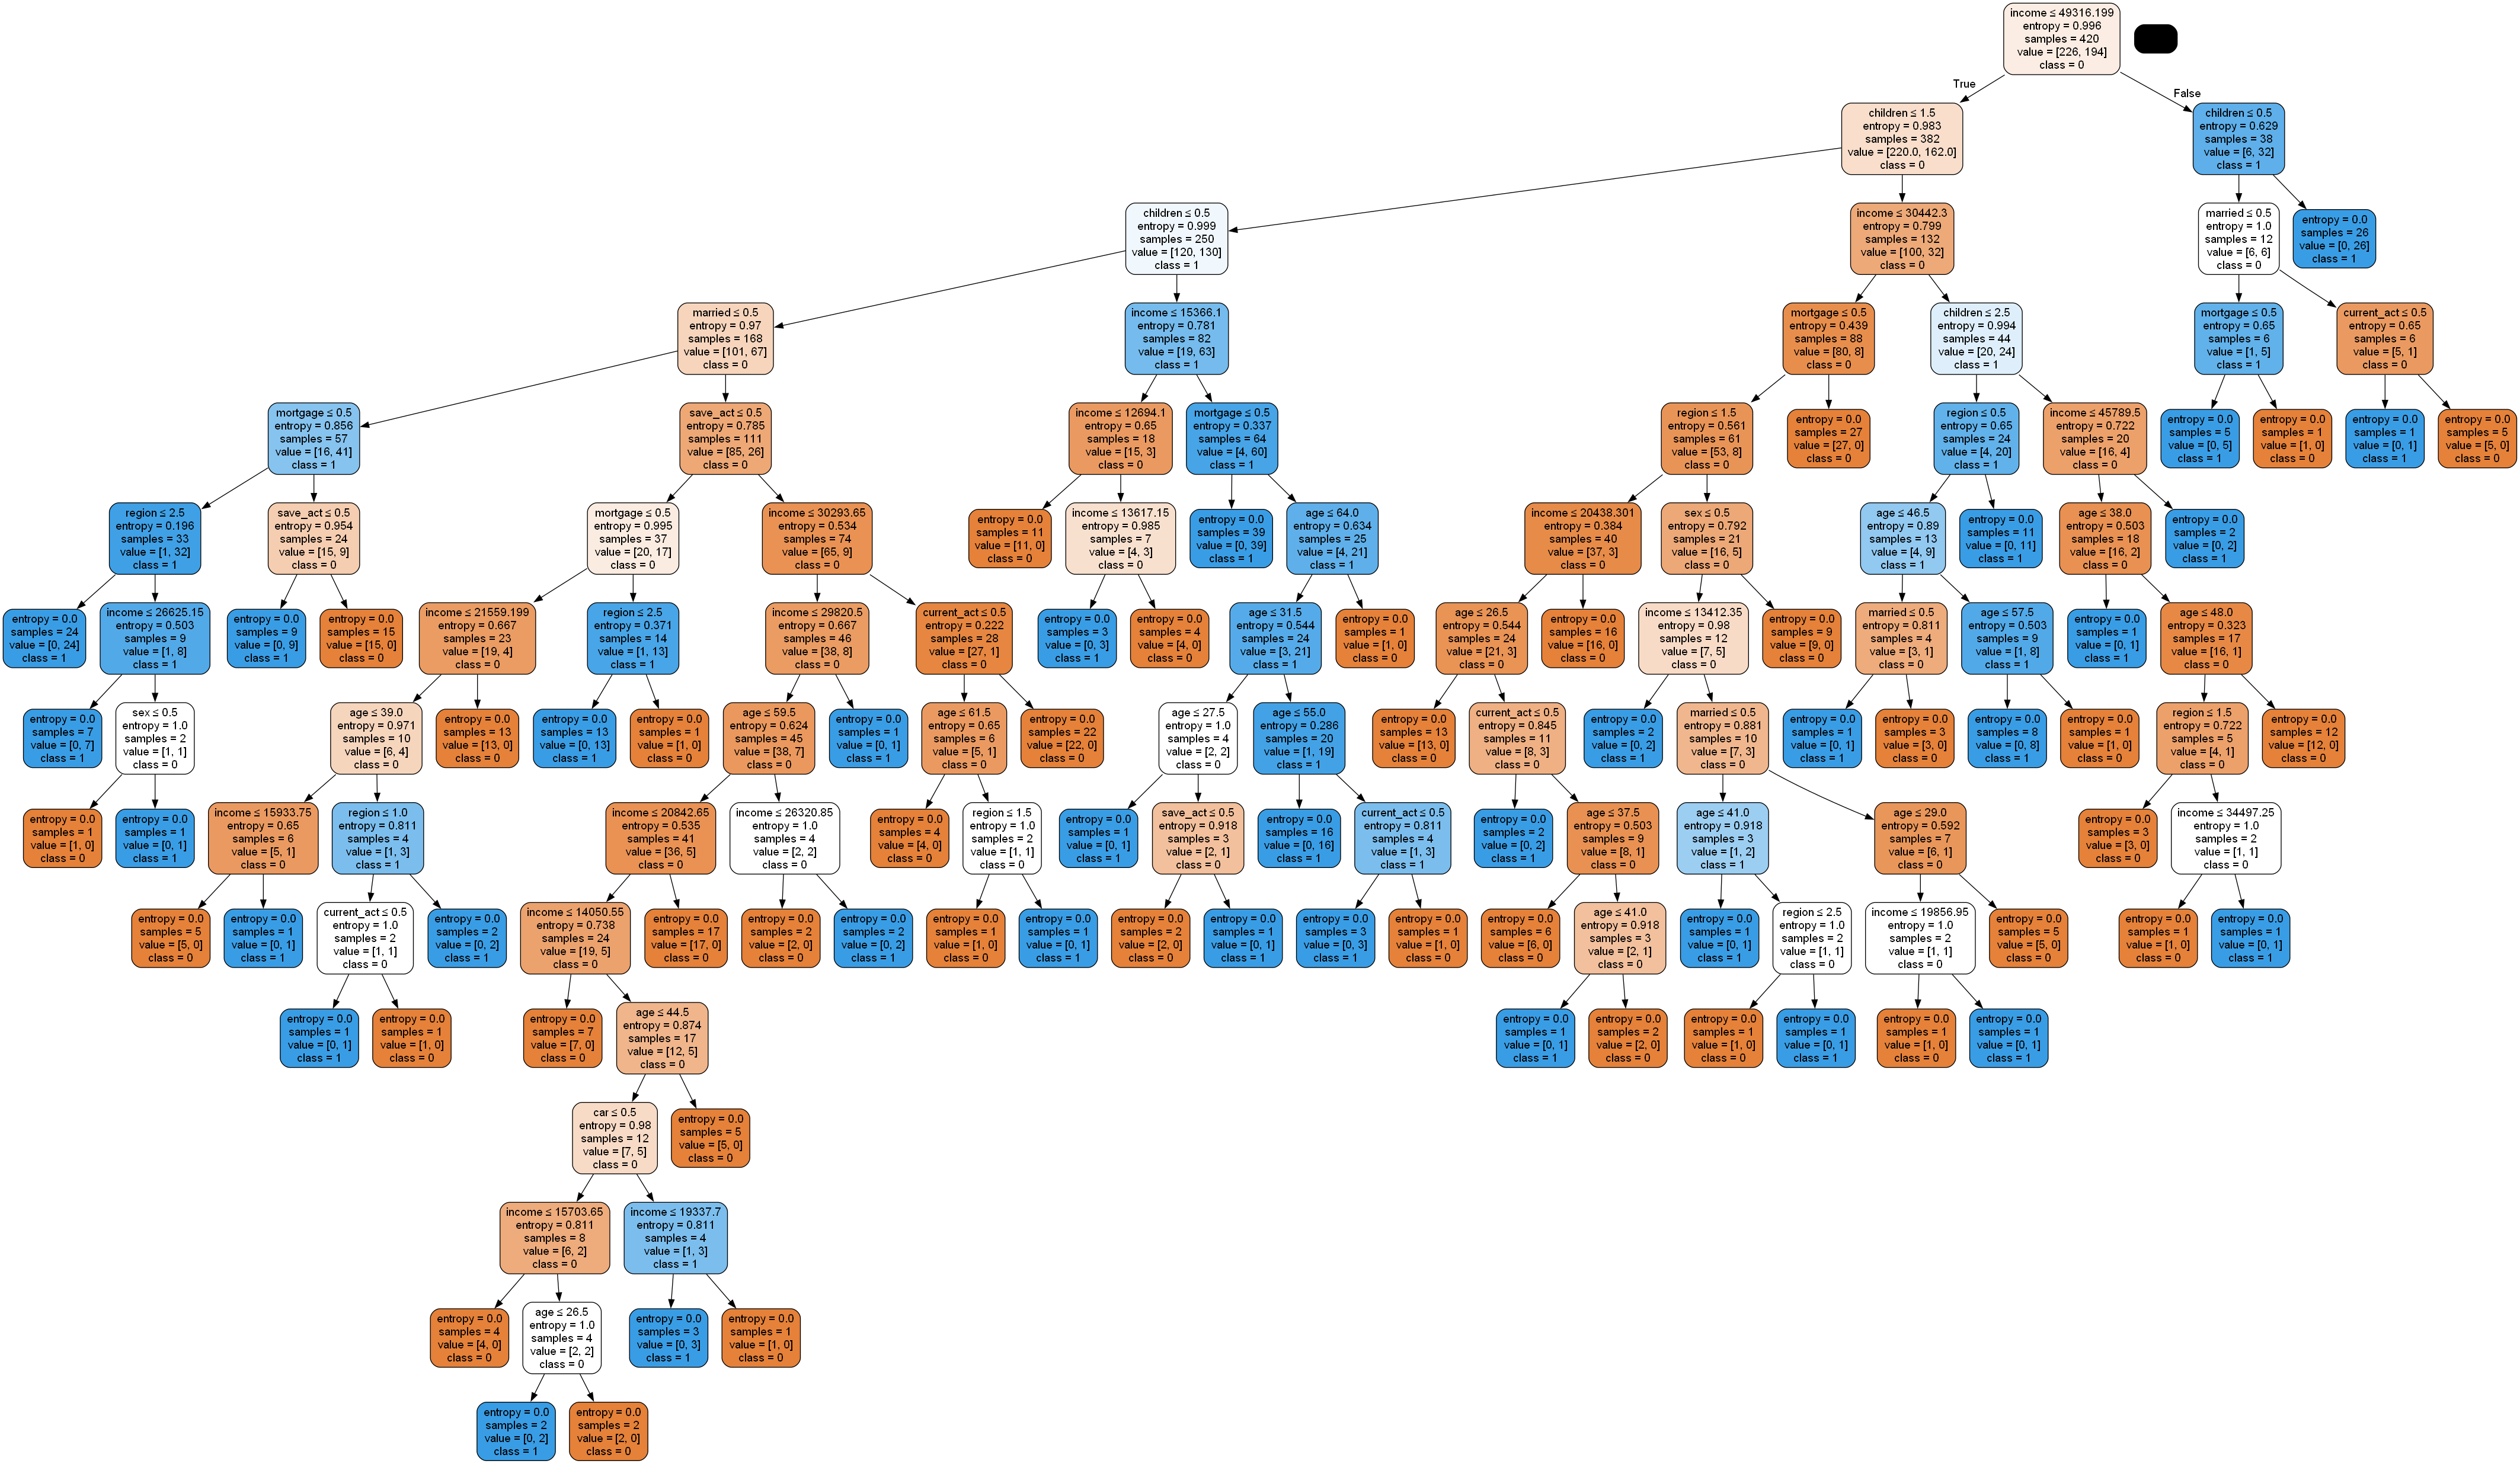

In [31]:
dot_data = StringIO()
feature_cols = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act", "mortgage"]
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Hyperparameter tuning

Text(0.5, 1.0, 'Accuracy vs. Max Depth')

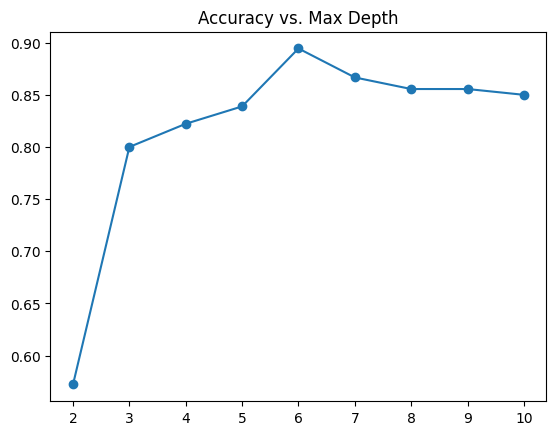

In [32]:
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_values = []
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.plot(max_depth_values, accuracy_values, marker='o')
plt.title('Accuracy vs. Max Depth')

In [33]:
# Create Decision Tree classifer object
# The default criterion is gini, but entropy can also be used, add entropy use criterion='entropy'
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [34]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision, how consistent is the classifier?
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.8944444444444445
Precision: 0.8961038961038961


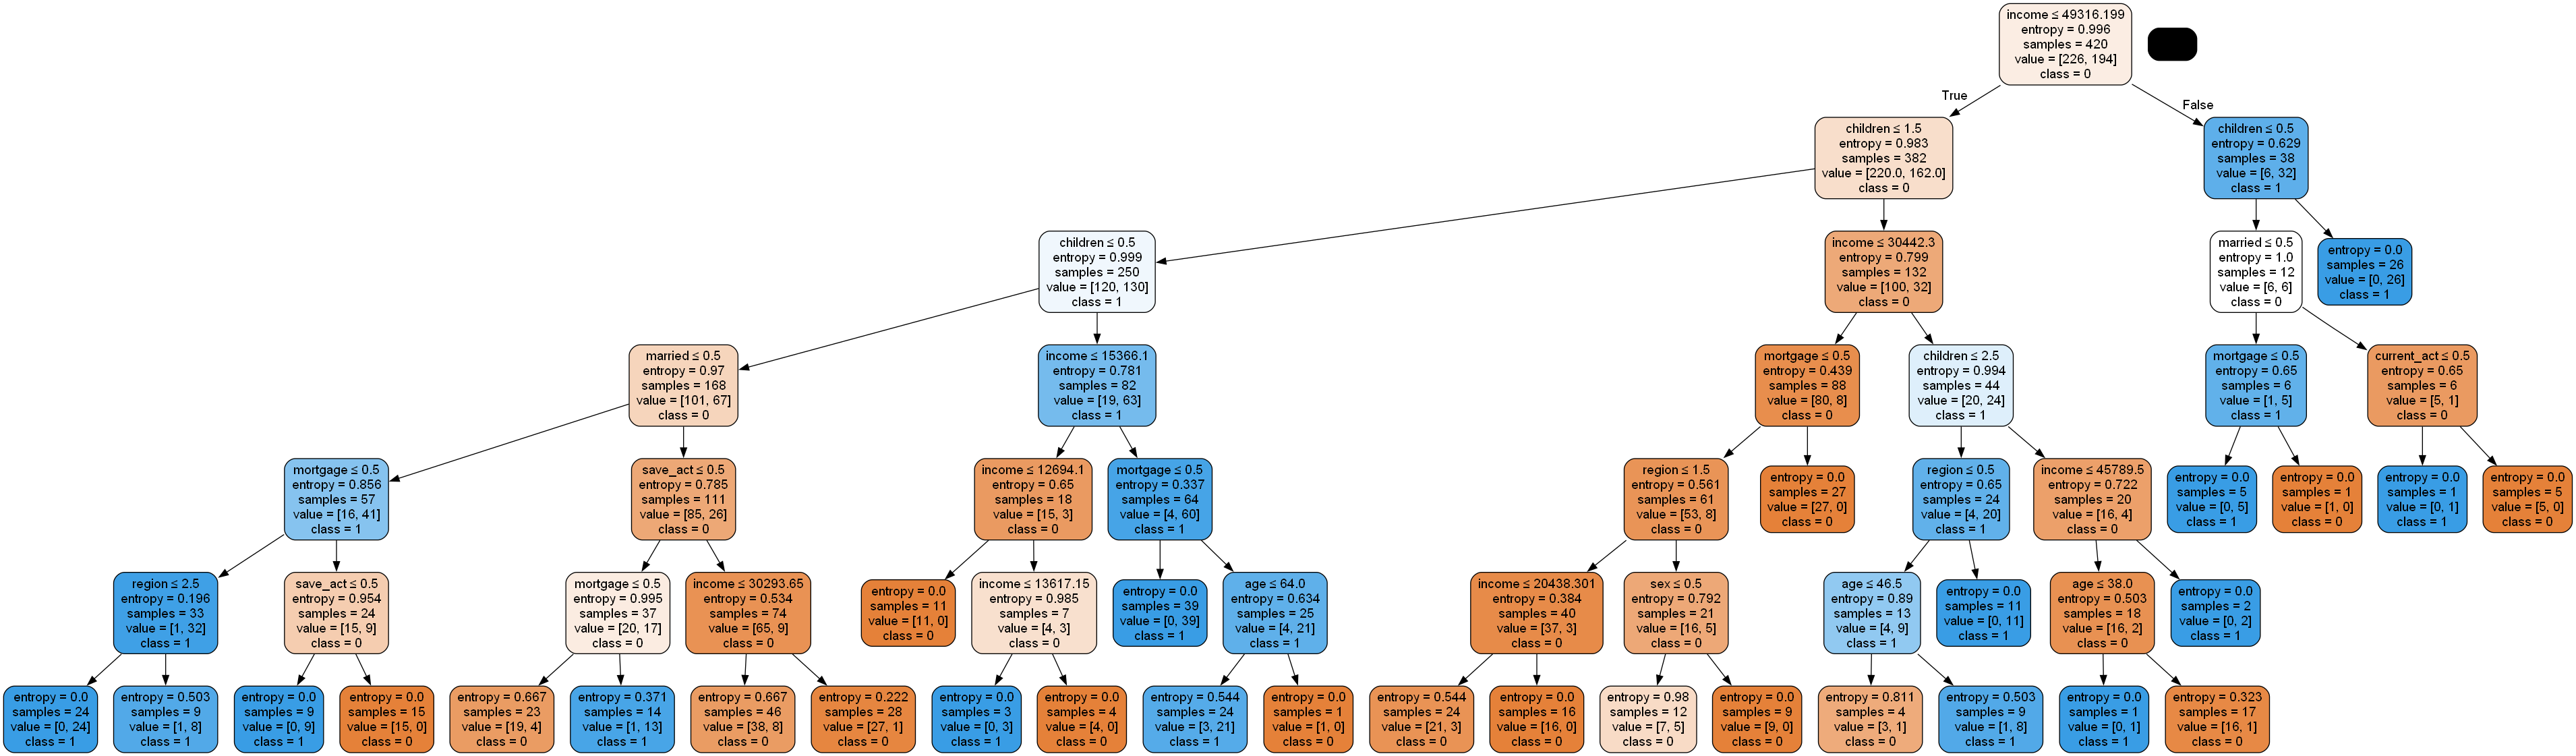

In [35]:
dot_data = StringIO()
feature_cols = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act", "mortgage"]
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

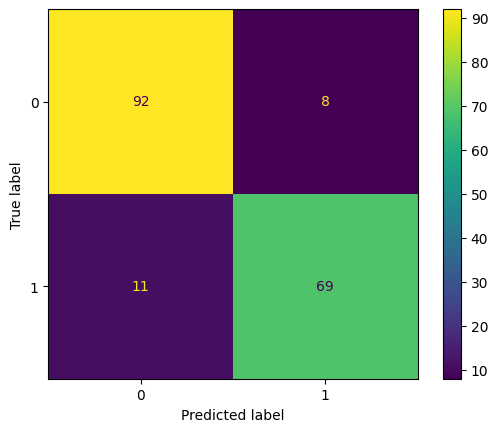

In [36]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
visualized_cm = ConfusionMatrixDisplay(cnf_matrix, display_labels=["0", "1"]).plot()